# Introduction to MyVision
This is a library I made to combine everything I <3 about PyTorch.
My goal is "Do more with less code". Well `MyVision` is a wrapper over PyTorch.
That means u must know PyTorch before working with it and if u know PyTorch you can yourself make any customizations. Just have at look at the source code on github.

With this aside let's start our example. It's the MNIST example as u might have guessed already :P

In [1]:
# torch imports
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

In [2]:
# standard "Every ML/DL problem" imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

So, let me give u a brief overview of what `MyVision` offers:
There are two important things at the heart of it.
1. Dataset
2. Trainer
<br>
The former one we will go through in another example.
Here, we go through `Trainer`

So what is `Trainer`?
Simply, Trainer provides trainig and validation methods, normally in PyTorch you have to write your
custom loop, which let me tell you, gives you ultimate customization. But I wanted to do something like what keras `.fit()` offers. So I decided to build it up.

Trainer offers you this keras like `.fit()` magic. With proper parameters you can simply `.fit()` and *boom!* training begins.

So, let's import the specifics. 
Our `Trainer` is present in `MyVision.engine.Engine`

In [3]:
import MyVision
from MyVision.engine.Engine import Trainer
from MyVision.utils.freeze_layers import ModelLayers
from MyVision.utils.PlotUtils import show_batch

Below we just make the two DataLoaders because as you know in PyTorch `DataLoader` is where the heavylifting takes place. Our trainer expects these DataLoaders

In [4]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
    batch_size=512, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
    batch_size=512, shuffle=True
)

Next we do usual stuff i.e. define our `model`, `optimizer` & `loss` 

In [5]:
model = torchvision.models.resnet18(pretrained=True)
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = torch.nn.Linear(in_features=model.fc.in_features, out_features=10)

# for p in model.parameters():
#     p.requires_grad = False
# for p in model.fc.parameters():
#     p.requires_grad = True
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adadelta(model.parameters(), lr=0.01)

Below is the part to what we have been building upto aka `Trainer`.
Let's have a look at what functions does the `Trainer` has.
Run the cell below to see:

In [6]:
?Trainer.fit

Signature:
Trainer.fit(
    train_loader,
    val_loader,
    device,
    criterion,
    optimizer,
    model,
    epochs,
    metric_name='accuracy',
    lr_scheduler=None,
    checkpoint_path='models',
    accumulation_steps=1,
    csv_logger=True,
)
Docstring: <no docstring>
File:      e:\library\myvision\engine\engine.py
Type:      function


You will see that out `Trainer` just takes in the usual stuff:
1. Training, Validation & Test(if specified) DataLoaders
2. device(either `cpu` or `cuda`)
3. loss
4. optimizer
5. model
6. learning rate scheduler(if you want)
<br>
Whatever you don't want just specify it as `None`.

Finally, for the magic to begin specifiy number of epochs and the scheduler metric in the `.fit()`
Now just run the cell below and we are off !

In [7]:
Trainer.fit(
    train_loader=train_loader,
    val_loader=test_loader,
    device='cuda',
    criterion=loss,
    optimizer=optimizer,
    model=model.to('cuda'),
    lr_scheduler=None,
    metric_name='accuracy',
    epochs=5
)

100%|██████████| 20/20 [00:03<00:00,  6.66it/s]
[SAVING] to models\model-[15062020-233011].pt
+-------+------------+-----------------+----------+
| Epoch | Train loss | Validation loss | accuracy |
+-------+------------+-----------------+----------+
|   1   |   1.202    |      0.477      |  0.864   |
+-------+------------+-----------------+----------+
Epoch completed in: 1.061501650015513 mins
100%|██████████| 20/20 [00:02<00:00,  7.12it/s]
[SAVING] to models\model-[15062020-233113].pt
+-------+------------+-----------------+----------+
| Epoch | Train loss | Validation loss | accuracy |
+-------+------------+-----------------+----------+
|   1   |   1.202    |      0.477      |  0.864   |
|   2   |   0.329    |      0.243      |  0.929   |
+-------+------------+-----------------+----------+
Epoch completed in: 1.0367061575253804 mins
100%|██████████| 20/20 [00:02<00:00,  7.06it/s]
[SAVING] to models\model-[15062020-233213].pt
+-------+------------+-----------------+----------+
| Epoch

As you must have seen most of it just regular PyTorch stuff but with lots of convinience. If you know PyTorch it's just a breeze for you to understand :) 

Also `MyVision` creates a models folder in the directory where you run the script and saves the best models to it epoch-wise 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


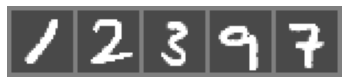

1     2     3     9     7


In [8]:
show_batch(
    datasets.MNIST('data', train=True, download=True, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
    classes=[0,1,2,3,4,5,6,7,8,9]
)